In [37]:
pip install plotly

You are using pip version 10.0.1, however version 20.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [142]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot

import plotly.express as px 
import plotly.graph_objs as go
from plotly.offline import iplot

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

plt.style.use('fivethirtyeight')



In [143]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [144]:
data = pd.read_csv('lung_cancer_examples.csv')

In [145]:
data.shape


(59, 7)

In [146]:
data.columns

Index(['Name', 'Surname', 'Age', 'Smokes', 'AreaQ', 'Alkhol', 'Result'], dtype='object')

In [147]:
data.head(15)

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
5,Cristiano,Ronaldo,34,0,10,0,0
6,Mihail,Tal,58,15,10,0,0
7,Kathy,Bates,22,12,5,2,0
8,Nicole,Kidman,45,2,6,0,0
9,Ray,Milland,52,18,4,5,1


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [149]:
# Trying to see whether there is any null value or not in the dataset from each columns
data.isnull().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

In [150]:
# the number of unique values in Smokes columns 
# this would give us an idea of the unique number of cigarettes smoked by people
print(data['Smokes'].nunique())
data['Smokes'].unique()

16


array([ 3, 20,  0,  4, 15, 12,  2, 18, 10, 25, 22,  5,  8, 13, 30, 34],
      dtype=int64)

In [151]:
# lets check the values in the Smokes column
data['Smokes'].value_counts()

20    18
15     7
12     5
10     5
25     4
0      3
30     2
18     2
13     2
5      2
4      2
3      2
2      2
34     1
22     1
8      1
Name: Smokes, dtype: int64

In [152]:
# lets check the values in the Age column
data['Age'].value_counts()

62    4
33    3
34    3
28    3
26    3
22    2
39    2
35    2
55    2
77    2
37    2
21    2
47    2
44    2
25    2
42    2
63    1
19    1
18    1
75    1
73    1
69    1
27    1
36    1
30    1
31    1
40    1
43    1
45    1
50    1
51    1
52    1
53    1
56    1
58    1
59    1
68    1
Name: Age, dtype: int64

In [154]:
# lets check the values in the Alkhol column
data['Alkhol'].value_counts()

2    10
4     8
3     8
1     8
0     8
5     6
8     5
6     5
7     1
Name: Alkhol, dtype: int64

In [153]:
# We'll classify smokers into 3 categories - Light(<=2),Mediocre(2-10),Heavy(>10)

def Smokes(x):
    if x==0:
        return 'Non-Smokers'
    elif x <= 2:
        return 'Light Smokers'
    elif x>2 and x<=10:
        return 'Mediocre Smokers'
    else:
        return 'Heavy Smokers'
    
# lets apply this function on the Smokes column
data['Smokes'] = data['Smokes'].apply(Smokes)

# lets check the values of Smokes column
data['Smokes'].value_counts()


Heavy Smokers       42
Mediocre Smokers    12
Non-Smokers          3
Light Smokers        2
Name: Smokes, dtype: int64

In [155]:
# We'll classify smokers into 3 categories - Light(<=2),Mediocre(2-10),Heavy(>10)

def Alkhol(x):
    if x==0:
        return 'Non-Drinkers'
    elif x <= 2:
        return 'Light Drinkers'
    elif x>2 and x<=10:
        return 'Mediocre Drinkers'
    else:
        return 'Heavy Drinkers'
    
# lets apply this function on the Alkhol column
data['Alkhol'] = data['Alkhol'].apply(Alkhol)

# lets check the values of Alkhol column
data['Alkhol'].value_counts()

Mediocre Drinkers    33
Light Drinkers       18
Non-Drinkers          8
Name: Alkhol, dtype: int64

    index            Smokes  Age
0      55     Heavy Smokers   77
1      24  Mediocre Smokers   77
2      56     Heavy Smokers   75
3      19  Mediocre Smokers   73
4      42     Heavy Smokers   69
5       4  Mediocre Smokers   68
6      43     Heavy Smokers   63
7      33     Heavy Smokers   62
8      37     Heavy Smokers   62
9      49     Heavy Smokers   62
10     18  Mediocre Smokers   62
11     36     Heavy Smokers   59
12      6     Heavy Smokers   58
13     31     Heavy Smokers   56
14     28     Heavy Smokers   55
15     20     Heavy Smokers   55
16     48     Heavy Smokers   53
17      9     Heavy Smokers   52
18     58     Heavy Smokers   51
19     40     Heavy Smokers   50
20     41     Heavy Smokers   47
21     32     Heavy Smokers   47
22      8     Light Smokers   45
23     23  Mediocre Smokers   44
24     51     Heavy Smokers   44
25     57     Heavy Smokers   43
26     16     Heavy Smokers   42
27     50     Heavy Smokers   42
28     29     Heavy Smokers   40
29     44 

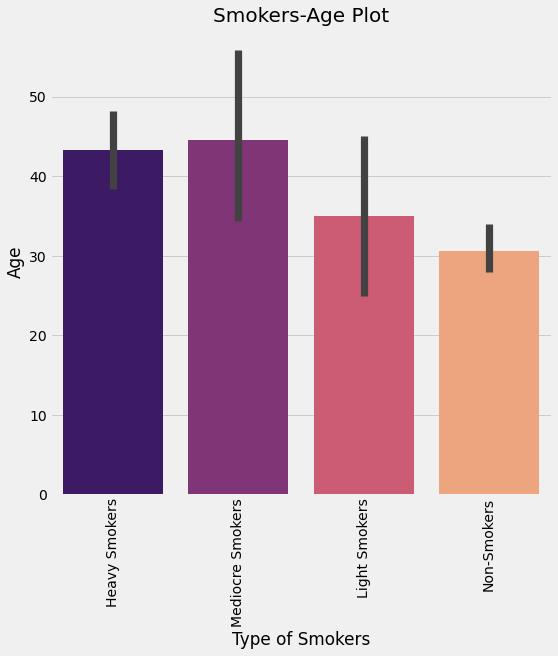

In [159]:

x = data[['Smokes','Age']].sort_values(by = 'Age',ascending = False).head(60).reset_index()
print(x)



sns.barplot(x['Smokes'], x['Age'], palette = 'magma')
plt.title('Smokers-Age Plot', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 14)
plt.xlabel('Type of Smokers')
plt.show()

In [172]:
# display(data[['Age']].groupby(['Age']).agg(['max','mean','min']))

In [169]:
data.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,Mediocre Smokers,5,Mediocre Drinkers,1
1,John,Constantine,27,Heavy Smokers,2,Mediocre Drinkers,1
2,Camela,Anderson,30,Non-Smokers,5,Light Drinkers,0
3,Alex,Telles,28,Non-Smokers,8,Light Drinkers,0
4,Diego,Maradona,68,Mediocre Smokers,5,Mediocre Drinkers,1


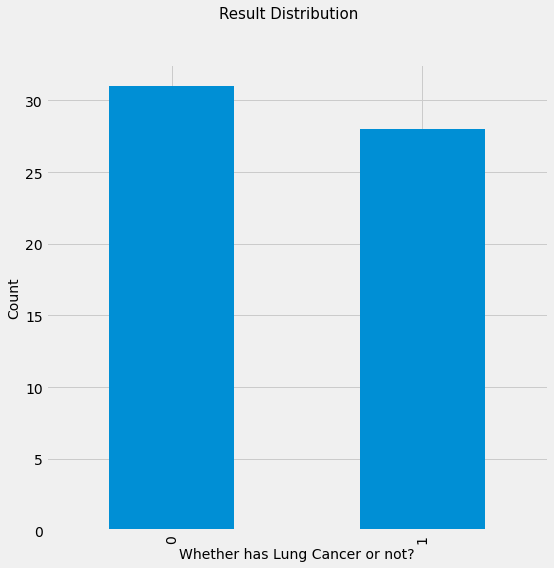

In [176]:
#if we want to get the count of the Result(where 0 indicates not tested with lung cancer and 1 indicates positive for lung cancer.)
# So, here we'll take a count of both and see the distribution

data.Result.value_counts().plot(kind='bar')
plt.suptitle('Result Distribution', fontsize = 15)
plt.xlabel('Whether has Lung Cancer or not?', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

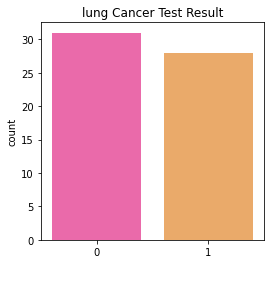

In [30]:
# lets check the lung Cancer Test Result

plt.rcParams['figure.figsize'] = (4, 4)
sns.countplot(data['Result'], palette = 'spring')
plt.xlabel(' ', fontsize = 14)
plt.title('lung Cancer Test Result')
plt.show()

## Now we shall check the % of people affected and not affected with Lung Cancer


In [81]:
# Lets see the distribution of Data about the persons who are suffering from 
# Lung Cancer or Not

labels = data['Result'].value_counts()[:].index
values = data['Result'].value_counts()[:].values

colors=['steelblue', 'firebrick']

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent",
                            insidetextorientation="radial", marker=dict(colors=colors))])

fig.show()

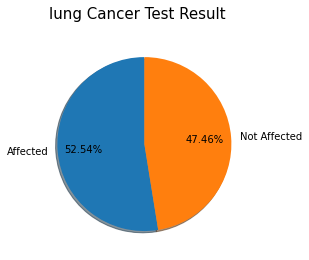

In [63]:
data['Result'].value_counts().plot(kind = 'pie', explode = [0, 0.001], autopct = '%.2f%%', startangle = 90,
                                       labels = ['Affected','Not Affected'], shadow = True, pctdistance = 0.7)
plt.axis('off')
labels = ['0', '1']
plt.suptitle('lung Cancer Test Result', fontsize = 15)
plt.show()

In [65]:
# the number of unique values in Age columns
print(data['Age'].nunique())
data['Age'].unique()

37


array([35, 27, 30, 28, 68, 34, 58, 22, 45, 52, 33, 18, 25, 39, 42, 19, 62,
       73, 55, 44, 77, 21, 37, 40, 36, 56, 47, 26, 59, 50, 69, 63, 31, 53,
       75, 43, 51], dtype=int64)

In [66]:
## As Name and Surname are not very important attributes in this analysis, we are dropping them
data.drop(['Name', 'Surname'], inplace = True, axis = 'columns')
data.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [69]:

data.head(20)

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1
5,34,0,10,0,0
6,58,15,10,0,0
7,22,12,5,2,0
8,45,2,6,0,0
9,52,18,4,5,1


In [75]:
# Lets visualize the distribution of the person who are smokers in 
# terms of the number of cigrattes smoked

# I will plot here the pie graph for all the smokers % based on no. of cigarettes smoked per day

labels = data['Smokes'].value_counts()[:].index
values = data['Smokes'].value_counts()[:].values

colors=data['Smokes']

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent",
                            insidetextorientation="radial", marker=dict(colors=colors))])



fig.show()

In [87]:
# Lets visualize whether the % of people who consumes Alkhol 

labels = data['Alkhol'].value_counts().index
values = data['Alkhol'].value_counts().values

colors=data['Alkhol']

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent", 
                            insidetextorientation="radial", marker=dict(colors=colors))])

fig.show()

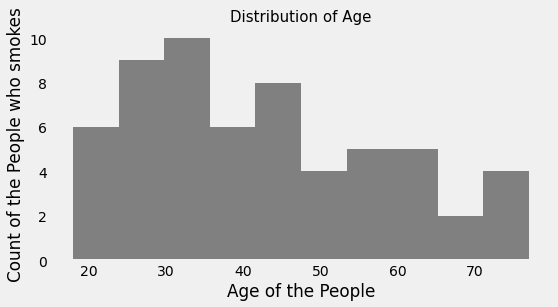

In [179]:
plt.rcParams['figure.figsize'] = (8, 4)
plt.hist(data['Age'], color = 'grey')
plt.title('Distribution of Age', fontsize = 15)
plt.xlabel('Age of the People')
plt.ylabel('Count of the People who smokes')
plt.grid()
plt.show()

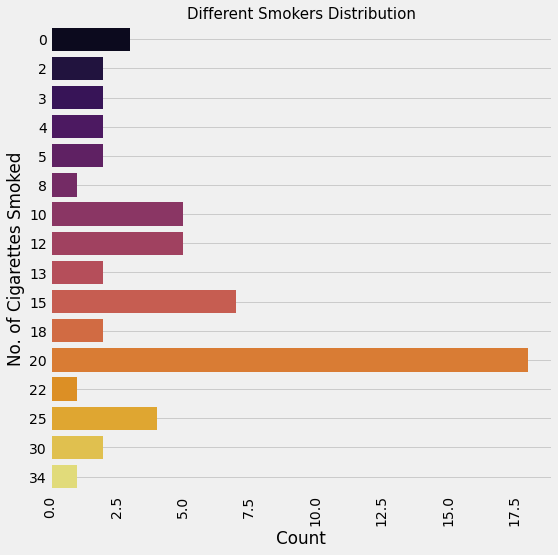

In [89]:
# lets check distribution of people who smoke

plt.rcParams['figure.figsize'] = (8,8)
plt.style.use('fivethirtyeight')
sns.countplot(y = data['Smokes'], palette = 'inferno', orient = 'v')
plt.xlabel('')
plt.ylabel('No. of Cigarettes Smoked')
plt.xlabel('Count')

plt.title('Different Smokers Distribution', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [91]:
! pip install dexplot

You are using pip version 10.0.1, however version 20.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


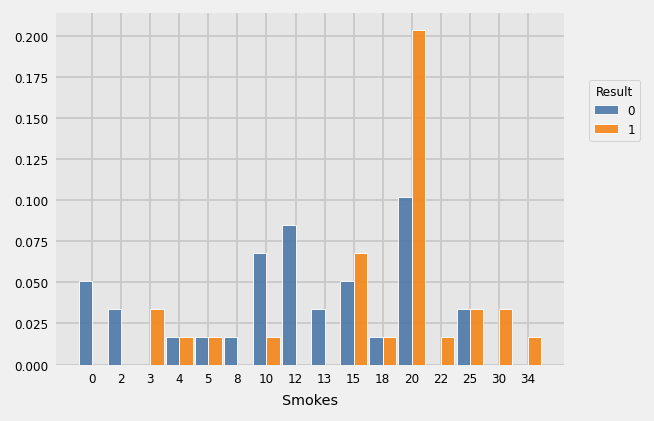

In [94]:
# Lets visualize the number of cigarattes one Smoke and whether he suffers from 
# Lung Cancer or not

import dexplot as dxp

dxp.count(val='Smokes', data=data, figsize=(4,3), split = 'Result', normalize=True)

## Building and Training the Model

In [96]:
# Splitting the data

from sklearn.model_selection import train_test_split

X = data.drop(['Result'], axis = 'columns')
y = data['Result']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [97]:
# Printing the shape of the splitted data

print('The shape of X_train is {}'.format(X_train.shape))
print('The shape of X_test is {}'.format(X_test.shape))
print('The shape of y_train is {}'.format(y_train.shape))
print('The shape of y_test is {}'.format(y_test.shape))

The shape of X_train is (47, 4)
The shape of X_test is (12, 4)
The shape of y_train is (47,)
The shape of y_test is (12,)


In [98]:
# Defining the model to calculate the True Positive, True Negative, False Positive and False Negative

def true_positive(y_true, y_pred):
    """
    Function to calculate the True Positive
    : param y_true: list of true values
    : param y_pred: list of predicted values
    : return: number of true positives
    """
    
    # initialize
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    """
    Function to calculate the True negatives
    : param y_true: list of true values
    : param y_pred: list of predicted values
    : return: number of true negatives
    """
    
    # initialize
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    """
    Function to calculate the False Positive
    : param y_true: list of true values
    : param y_pred: list of predicted values
    : return: number of false positives
    """
    
    # initialize
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    """
    Function to calculate the False Negative
    : param y_true: list of true values
    : param y_pred: list of predicted values
    : return: number of true positives
    """
    
    # initialize
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

Now we will implement different ML Models to test the Accuracy, Precision, Recall, F1/F-Score, ROC AUC curve and plot the Confusion Matrix

## Model 1. Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
predict1 = model_log.predict(X_test)

In [100]:
# Now we shall check for the accuracy of the model.
# Defining the model

def accuracy_score(y_true, y_pred):
    """
    Function to calculate the True Positive
    : param y_true: list of true values
    : param y_pred: list of predicted values
    : return: accuracy score
    """
    
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    
    accuracy_score = (tp+tn)/(tp+tn+fp+fn)
    return accuracy_score


# Calculating the accuracy score of the above model

accuracy_score(y_test, predict1)

1.0

In [103]:
## CONCLUSION-
## From the above model we can see that the model seems to be 100% accurate since the data is small we can cross-check even
## but for the larger dataset 100% accuracy is clear indication of model being biased

In [104]:
# Now we shall check for the precision of the model.
# Defining the model

def precision(y_true, y_pred):
    """
    Function to calculate the True Positive
    : param y_true: list of true values
    : param y_pred: list of predicted values
    : return: precision score
    """
    
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp/(tp+fp)
    return precision

# Calculating the precision score of the above model

precision(y_test, predict1)

1.0

In [105]:
# Now we shall check for the recall of the model.


def recall(y_true, y_pred):
    """
    Function to calculate the True Positive
    : param y_true: list of true values
    : param y_pred: list of predicted values
    : return: recall score
    """
    
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp/(tp+fn)
    return recall

# Calculating the recall score of the above model

recall(y_test, predict1)

1.0

In [108]:
# Now we shall check for the F1-score of the model.


def f1(y_true, y_pred):
    """
    Function to calculate the True Positive
    : param y_true: list of true values
    : param y_pred: list of predicted values
    : return: f1 score
    """
    
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    
    score = 2*p*r/(p+r)
    
    return score
# Calculating the f1 score 

f1(y_test, predict1)

1.0

In [109]:
# Calculating the roc_auc_score

from sklearn import metrics
metrics.roc_auc_score(y_test, predict1)

1.0

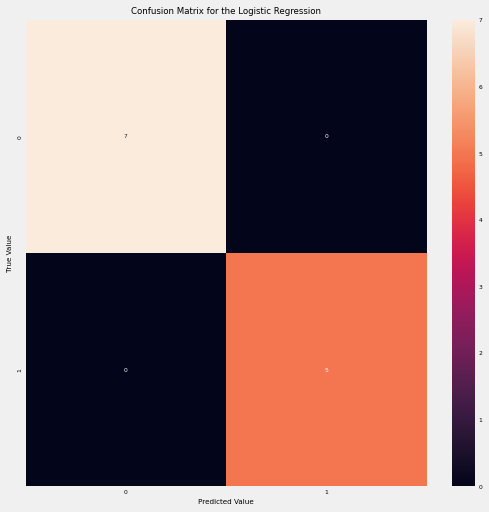

In [112]:
# Plotting the Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict1)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot = True, ax = ax)
plt.title('Confusion Matrix for the Logistic Regression')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

## Model 2. Decision Tree Classification

In [115]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, 
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_features=None, random_state=None, max_leaf_nodes=None, 
                                   min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, 
                                   presort='deprecated', ccp_alpha=0.0)
model_dtc.fit(X_train, y_train)
predict2 = model_dtc.predict(X_test)
# Calculating the accuracy score of the above model

print("Accuracy Score =", accuracy_score(y_test, predict2))

# Calculating the precision score of the above model


print("Precision =",precision(y_test, predict2))

# Calculating the recall score of the above model


print("Recall =", recall(y_test, predict2))

# Calculating the f1 score 

print("F1-Score =",f1(y_test, predict2))


# Calculating the roc_auc_score(Receiver Operating Characteristic - Area Under the Curve)

from sklearn import metrics
print("ROC AUC-Score =", metrics.roc_auc_score(y_test, predict2))
# Higher the AUC, better the model is at predicting 0's as 0's and 1's as 1's.
# Eg- Higher the AUC, better the model is at distinguishing between patients with disease and without disease.

Accuracy Score = 0.9166666666666666
Precision = 0.8333333333333334
Recall = 1.0
F1-Score = 0.9090909090909091
ROC AUC-Score = 0.9285714285714286


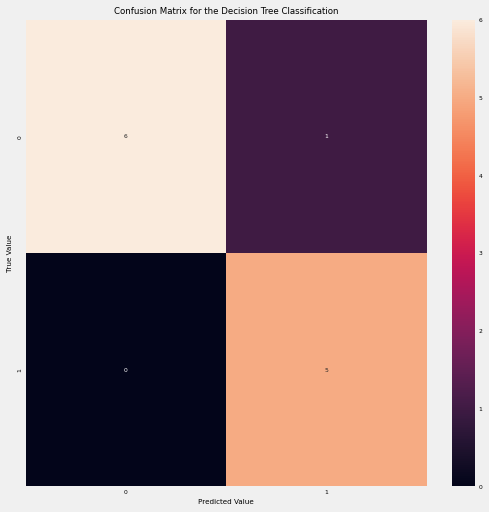

In [116]:
# Plotting the Confusion Matrix for Decision Trees

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict2)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot = True, ax = ax)
plt.title('Confusion Matrix for the Decision Tree Classification')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

## Model 3. Random Forest Classification

In [126]:
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
model_rfc = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                                   min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                   max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                                   bootstrap=True, oob_score=False, n_jobs=None, random_state=None, 
                                   verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
model_rfc.fit(X_train, y_train)
predict3 = model_rfc.predict(X_test)

# Calculating the accuracy score of the above model
print("Accuracy Score=", accuracy_score(y_test, predict3))

# Calculating the precision score of the above model


print("Precision =",precision(y_test, predict3))

# Calculating the recall score of the above model


print("Recall =", recall(y_test, predict3))

# Calculating the f1 score 

print("F1-Score =",f1(y_test, predict3))


# Calculating the roc_auc_score(Receiver Operating Characteristic - Area Under the Curve)

from sklearn import metrics
print("ROC AUC-Score =", metrics.roc_auc_score(y_test, predict3))
# Higher the AUC, better the model is at predicting 0's as 0's and 1's as 1's.
# Eg- Higher the AUC, better the model is at distinguishing between patients with disease and without disease.

Accuracy Score= 1.0
Precision = 1.0
Recall = 1.0
F1-Score = 1.0
ROC AUC-Score = 1.0


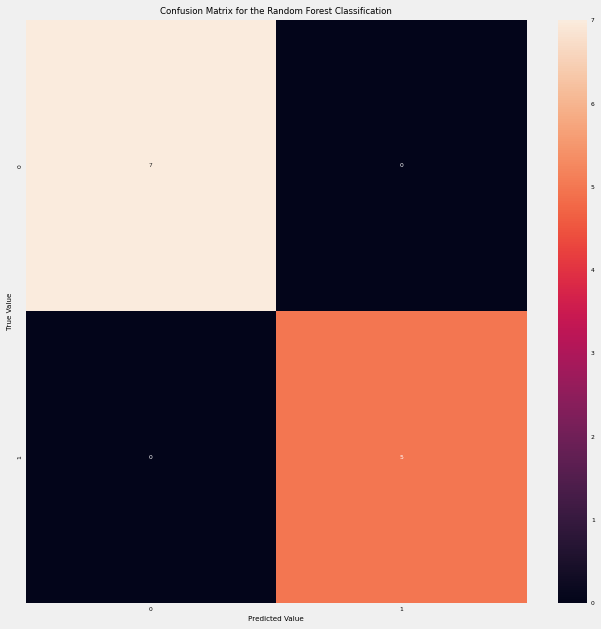

In [127]:
# Plotting the Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict3)
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot = True, ax = ax)
plt.title('Confusion Matrix for the Random Forest Classification')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

## Model 4. SVM

In [128]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
model_svm = svm.SVC(kernel='linear') # Linear Kernel

model_svm.fit(X_train, y_train)
predict4 = model_svm.predict(X_test)

# Calculating the accuracy score of the above model
print("Accuracy Score=", accuracy_score(y_test, predict4))

# Calculating the precision score of the above model


print("Precision =",precision(y_test, predict4))

# Calculating the recall score of the above model


print("Recall =", recall(y_test, predict4))

# Calculating the f1 score 

print("F1-Score =",f1(y_test, predict4))


# Calculating the roc_auc_score(Receiver Operating Characteristic - Area Under the Curve)

from sklearn import metrics
print("ROC AUC-Score =", metrics.roc_auc_score(y_test, predict4))
# Higher the AUC, better the model is at predicting 0's as 0's and 1's as 1's.
# Eg- Higher the AUC, better the model is at distinguishing between patients with disease and without disease.

Accuracy Score= 1.0
Precision = 1.0
Recall = 1.0
F1-Score = 1.0
ROC AUC-Score = 1.0


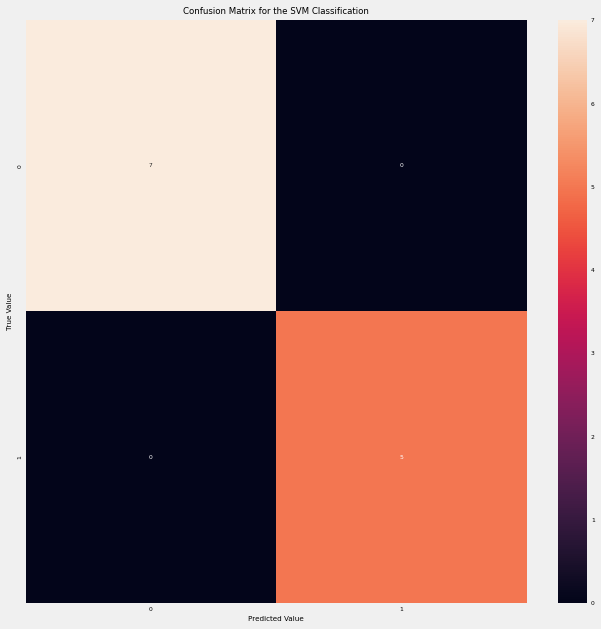

In [129]:
# Plotting the Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict4)
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot = True, ax = ax)
plt.title('Confusion Matrix for the SVM Classification')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

## Model 5. Naive Bayes

In [131]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model_NB = GaussianNB()

# Train the model using the training sets
model_NB.fit(X_train, y_train)
predict5 = model_NB.predict(X_test)

# Calculating the accuracy score of the above model
print("Accuracy Score=", accuracy_score(y_test, predict5))

# Calculating the precision score of the above model


print("Precision =",precision(y_test, predict5))

# Calculating the recall score of the above model


print("Recall =", recall(y_test, predict5))

# Calculating the f1 score 

print("F1-Score =",f1(y_test, predict5))


# Calculating the roc_auc_score(Receiver Operating Characteristic - Area Under the Curve)

from sklearn import metrics
print("ROC AUC-Score =", metrics.roc_auc_score(y_test, predict5))
# Higher the AUC, better the model is at predicting 0's as 0's and 1's as 1's.
# Eg- Higher the AUC, better the model is at distinguishing between patients with disease and without disease.


Accuracy Score= 1.0
Precision = 1.0
Recall = 1.0
F1-Score = 1.0
ROC AUC-Score = 1.0


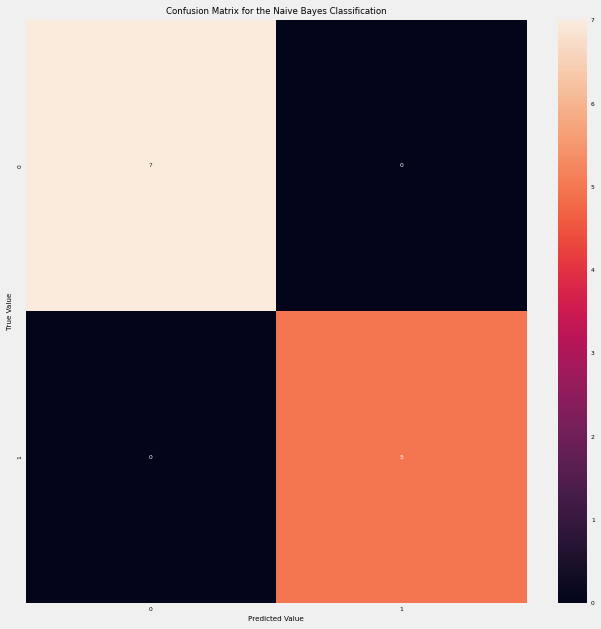

In [132]:
# Plotting the Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict5)
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot = True, ax = ax)
plt.title('Confusion Matrix for the Naive Bayes Classification')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()